# Heart Failuer Presentation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
df = pd.read_csv('heart_failure.csv')
print(df.head())

   Age  Gender Chest_Pain_Type  Resting_BP  Cholesterol  Fasting_Blood_Sugar  \
0   69    Male        Atypical         106          250                    1   
1   32    Male     Non-anginal         124          396                    1   
2   89  Female     Non-anginal         164          256                    1   
3   78  Female         Typical         116          297                    1   
4   38    Male     Non-anginal          88          386                    1   

                    Resting_ECG  Max_Heart_Rate  Exercise_Induced_Angina  \
0         ST-T Wave Abnormality             171                        0   
1  Left Ventricular Hypertrophy              73                        0   
2  Left Ventricular Hypertrophy             157                        0   
3                        Normal             163                        1   
4         ST-T Wave Abnormality             123                        1   

   Oldpeak        Slope  Num_Major_Vessels        Thalassemia 

In [5]:
X = df[['Age', 'Cholesterol']]

In [6]:
X = df[['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'Oldpeak']]


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
wcss = []

In [9]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init added for future-proofing
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

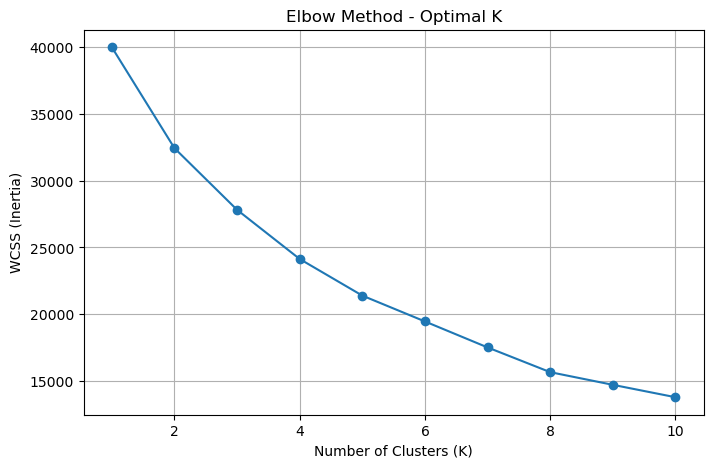

In [10]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [11]:
# Step 6: Apply KMeans with chosen K (e.g., K=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

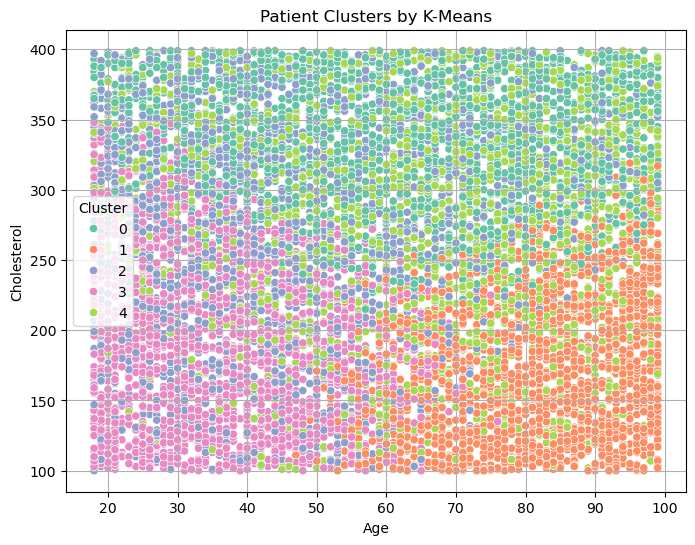

In [12]:
# Step 7: Visualize KMeans Clusters (use Age vs Cholesterol for example)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cholesterol', 
                hue='KMeans_Cluster', palette='Set2', data=df)
plt.title('Patient Clusters by K-Means')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

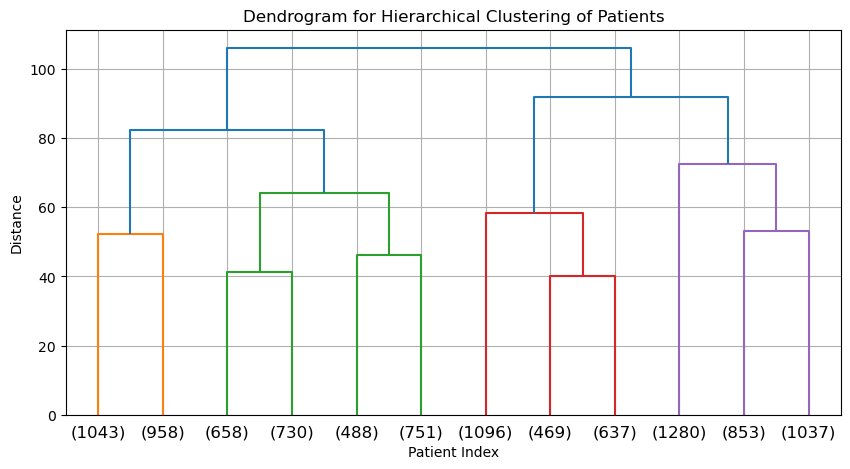

In [13]:
# Step 8: Hierarchical Clustering - Create Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering of Patients')
plt.xlabel('Patient Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [14]:
df['Hierarchical_Cluster'] = fcluster(linked, t=5, criterion='maxclust')

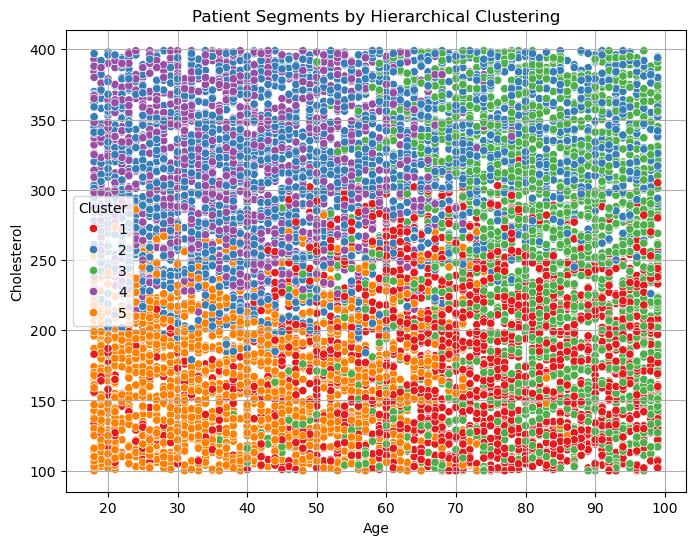

In [ ]:
# Step 10: Visualize Hierarchical Clusters (e.g., Age vs Cholesterol)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cholesterol', 
                hue='Hierarchical_Cluster', palette='Set1', data=df)
plt.title('Patient Segments by Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()